In [1]:
#data and lib import

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras import regularizers
from keras.losses import MeanSquaredError
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Read the original and edited training data into Pandas DataFrames
trainED = pd.read_csv('Data.csv')
test = pd.read_csv('test.csv')

In [2]:
# Exclude 'Image' column
#numeric_cols = trainED.columns[:-1]

# Scale the numeric columns to (0, 96)
#trainED[numeric_cols] = (trainED[numeric_cols] + 1) * 48


# Save the modified DataFrame to a new CSV file
#trainED.to_csv('Data.csv', index=False)

In [3]:
X_test = np.array([np.fromstring(x, dtype=int, sep=' ') for x in test['Image']])
X_test = X_test.reshape(-1, 96, 96, 1) / 255.0

mED,nED = trainED.shape
img_size = 96

imgED = []
for i in range(mED):
    spliting = np.array(trainED['Image'][i].split(' '),dtype = 'float64')
    splitting = np.reshape(spliting,(img_size,img_size,1))
    splitting /= 255 
    imgED.append(splitting)
imgED = np.array(imgED)

X_trainED = imgED
trainED.drop('Image', axis = 1, inplace = True)
y_trainED = []

for i in range(len(trainED)):
    yED = trainED.iloc[i,:].values
    y_trainED.append(yED)    
    
y_trainED= np.array(y_trainED, dtype = 'float')


In [4]:
model = Sequential([
   layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
   
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5), 
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Adding dropout for regularization
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(30)
])

C:\Users\2002g\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(96, 96, 1)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Conv2D(1024, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(30)  # Output layer with 30 neurons
])

In [6]:
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse',metrics = ['accuracy','mse','mae'])
history = model.fit(X_trainED.reshape(-1, 96, 96, 1), y_trainED, epochs=20, batch_size=8,validation_split=0.2)

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mse',metrics = ['accuracy','mse','mae'])
history2 = model.fit(X_trainED.reshape(-1, 96, 96, 1), y_trainED, epochs=20, batch_size=8,validation_split=0.2)

Epoch 1/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.2081 - loss: 741.1909 - mae: 20.4500 - mse: 741.1909 - val_accuracy: 0.4334 - val_loss: 17.9053 - val_mae: 3.2136 - val_mse: 17.9053
Epoch 2/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.4150 - loss: 125.2702 - mae: 8.6525 - mse: 125.2702 - val_accuracy: 0.4334 - val_loss: 15.2431 - val_mae: 2.9030 - val_mse: 15.2431
Epoch 3/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.4815 - loss: 91.4705 - mae: 7.3056 - mse: 91.4705 - val_accuracy: 0.4334 - val_loss: 28.3172 - val_mae: 4.2522 - val_mse: 28.3172
Epoch 4/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.5812 - loss: 78.0177 - mae: 6.7423 - mse: 78.0177 - val_accuracy: 0.4334 - val_loss: 17.3191 - val_mae: 3.1314 - val_mse: 17.3191
Epoch 5/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.5989 - loss: 74.6208 - mae: 6.4964 - mse: 74.6208 - val_accuracy: 0.4334 - val_loss: 14.8680 - val_mae: 2.8563 - val_mse: 14.8680
Epoch

In [7]:
y_test_predED = model.predict(X_test)
y_test_pred2ED = model2.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 573ms/step


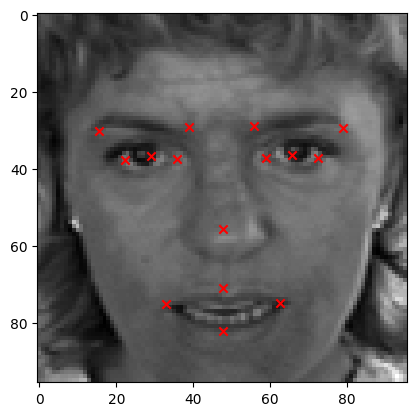

In [8]:
tED = y_test_predED[1]
plt.imshow(X_test[1], cmap='gray')
plt.scatter(tED[0::2], tED[1::2], c='red', marker='x')

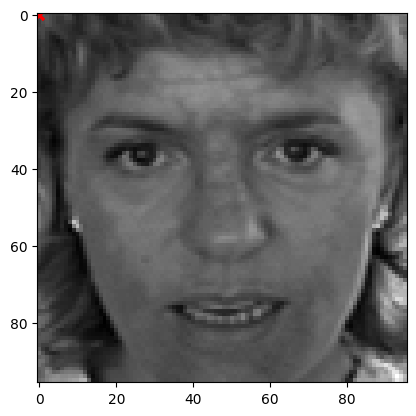

In [9]:
t2ED = y_test_pred2ED[1]
plt.imshow(X_test[1], cmap='gray')
plt.scatter(t2ED[0::2], t2ED[1::2], c='red', marker='x')

In [10]:
y_test_pred2ED[0]

array([ 5.0270103e-04, -2.7474167e-04, -6.3839322e-04, -3.3664392e-04,
       -1.3759809e-03,  2.9392906e-05,  4.8466682e-04,  4.8677222e-04,
        2.0660704e-03, -3.4746731e-04,  5.9335824e-04, -1.2520450e-03,
        9.0180803e-04,  1.4146701e-04, -1.1893542e-03,  1.4208815e-04,
       -1.2164268e-03,  2.3843537e-04,  8.9341088e-04, -1.0427186e-03,
        1.3041738e-03,  1.0524624e-03, -1.0448220e-03, -1.1483304e-04,
        8.8915334e-04, -5.7166332e-04, -5.2692514e-05, -7.9508248e-04,
       -9.1984251e-04, -1.3109070e-03], dtype=float32)

In [13]:
model.save("model_edited.h5")
model2.save("model2_edited.h5")